In [93]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # Python 3
    from urllib.request import urlopen, Request
except ImportError:
    # Fallback for Python 2
    from urllib2 import urlopen
    
%matplotlib inline

In [2]:
query = ("https://data.sfgov.org/resource/cuks-n6tp.json")
raw_data = pd.read_json(query)

In [3]:
raw_data.columns

Index([u':@computed_region_bh8s_q3mv', u':@computed_region_fyvs_ahh9',
       u':@computed_region_p5aj_wyqh', u':@computed_region_rxqg_mtj9',
       u':@computed_region_yftq_j783', u'address', u'category', u'date',
       u'dayofweek', u'descript', u'incidntnum', u'location', u'pddistrict',
       u'pdid', u'resolution', u'time', u'x', u'y'],
      dtype='object')

In [4]:
sf = raw_data

In [5]:
sf = sf.drop ([u':@computed_region_bh8s_q3mv', u':@computed_region_fyvs_ahh9',
       u':@computed_region_p5aj_wyqh', u':@computed_region_rxqg_mtj9',
       u':@computed_region_yftq_j783', u'descript', u'incidntnum',
       u'pdid', u'resolution', u'time',u'location'], axis = 1)

In [6]:
sf.head()

,address,category,date,dayofweek,pddistrict,x,y
0,1900 Block of 15TH ST,VANDALISM,2016-10-12,Wednesday,MISSION,-122.427143,37.766176
1,EDDY ST / JONES ST,NON-CRIMINAL,2016-10-12,Wednesday,TENDERLOIN,-122.412597,37.783932
2,HARBOR RD / NORTHRIDGE RD,WEAPON LAWS,2016-10-12,Wednesday,BAYVIEW,-122.377002,37.731011
3,HARBOR RD / NORTHRIDGE RD,OTHER OFFENSES,2016-10-12,Wednesday,BAYVIEW,-122.377002,37.731011
4,HARBOR RD / NORTHRIDGE RD,WEAPON LAWS,2016-10-12,Wednesday,BAYVIEW,-122.377002,37.731011


In [7]:
sf['date'] = pd.to_datetime(sf['date']) # i converted into numbers

In [8]:
sf1 = sf[(sf.date > '2015-01-01') & (sf.date <'2015-12-31')] # to choose the year of 2015.

In [92]:
sf1.category.value_counts().head()

LARCENY/THEFT     41832
OTHER OFFENSES    20241
NON-CRIMINAL      18984
ASSAULT           13007
VEHICLE THEFT      7908
Name: category, dtype: int64

In [86]:
sf1.dayofweek.value_counts()

Friday       23813
Saturday     22884
Wednesday    22417
Tuesday      21802
Monday       21755
Thursday     21479
Sunday       21288
Name: dayofweek, dtype: int64

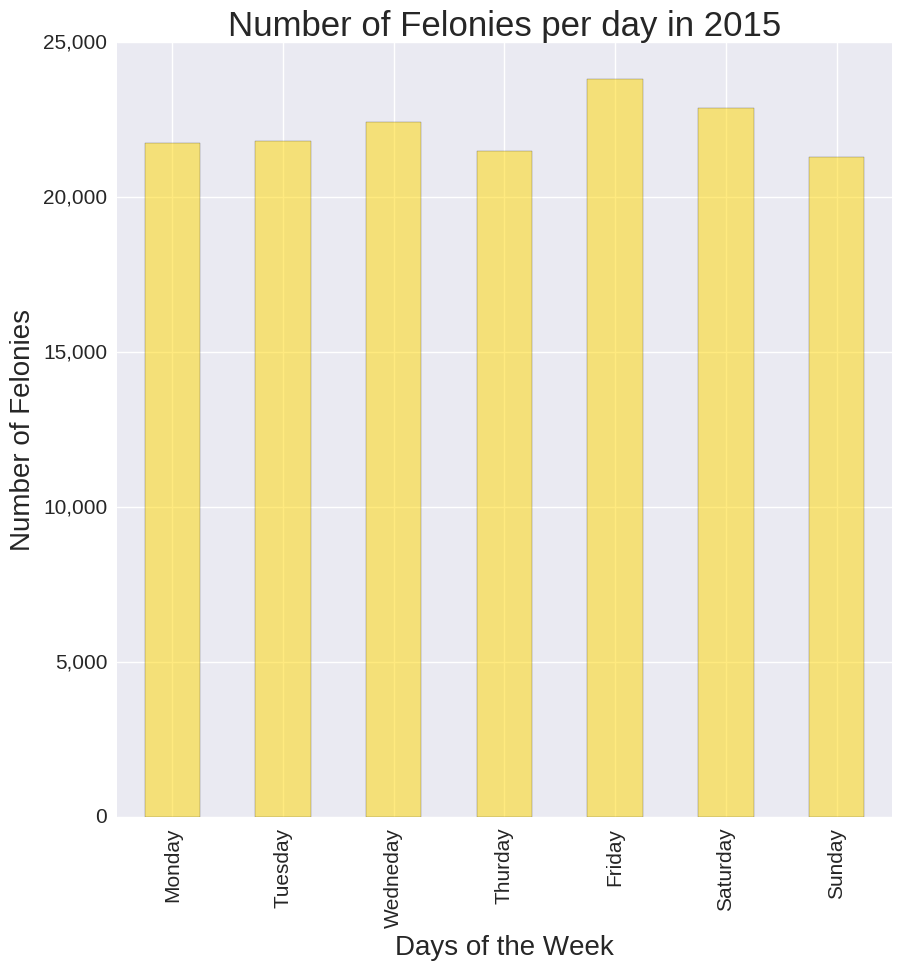

In [79]:
ax = plt.figure(figsize=(10,10))
ax = ((sf1['category'].groupby([sf1['date'].dt.weekday, sf1['dayofweek']]).count())).plot(kind="bar", 
                                                                                         color='Gold',
                                                                                         alpha=0.5, legend = False)

ax.xaxis.set_ticklabels(('Monday', 'Tuesday', 'Wedneday','Thurday', 'Friday', 'Saturday', 'Sunday'), fontsize=15)
ax.yaxis.set_ticklabels(('0', '5,000', '10,000', '15,000','20,000','25,000'), fontsize=15)
ax.set_xlabel('Days of the Week', size =20)
ax.set_ylabel('Number of Felonies', size = 20)
ax.set_title('Number of Felonies per day in 2015', size =25)

## Figure 1. Histogram of Felonies by day of the week in San Francisco in the year 2015.

It can be seen that the crime in San Francisco in 2015 was very uniform around 21,000 felonies. There is a slightly increment on the Weekend (Friday: 23,813, Saturday: 22884). 